In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/administrator/Documents/ML Programming/Datasets/houseprice.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Exploratory Data Analysis

In [3]:
data.shape

(4600, 18)

In [4]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
column_datatypes = data.dtypes

print("Datatypes of all columns:")
print(column_datatypes)

Datatypes of all columns:
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
num_data = data.drop(columns= ['date', 'street', 'city', 'statezip', 'country'], axis=1)

<Axes: >

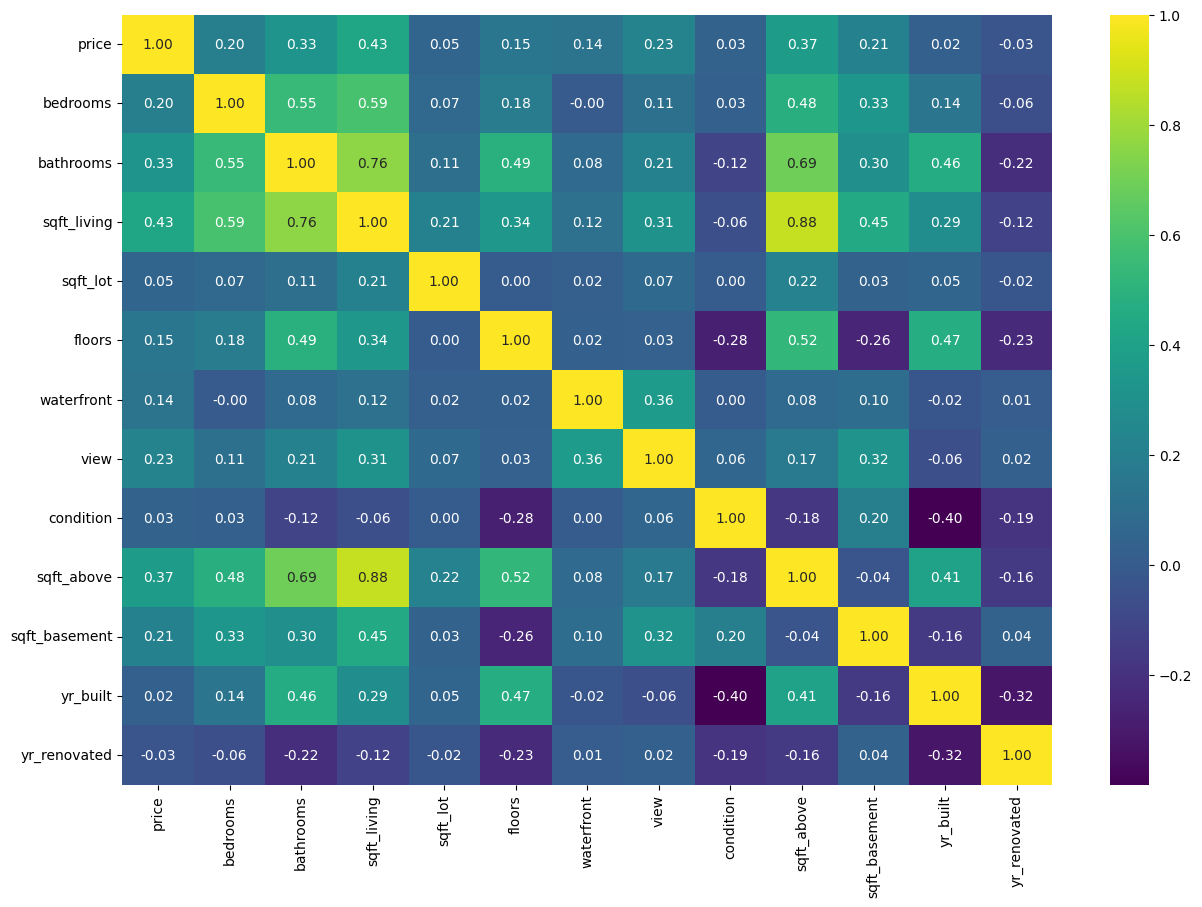

In [7]:
corr_matrix = num_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')

<Axes: ylabel='sqft_above'>

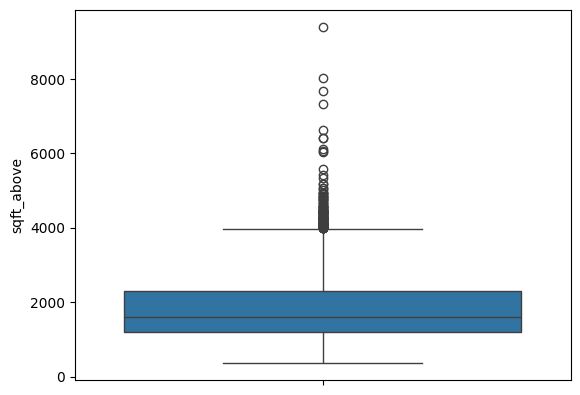

In [13]:
sns.boxplot(data['sqft_above']) #checking what is the sqft above of most of the houses (1000-2200)

1573


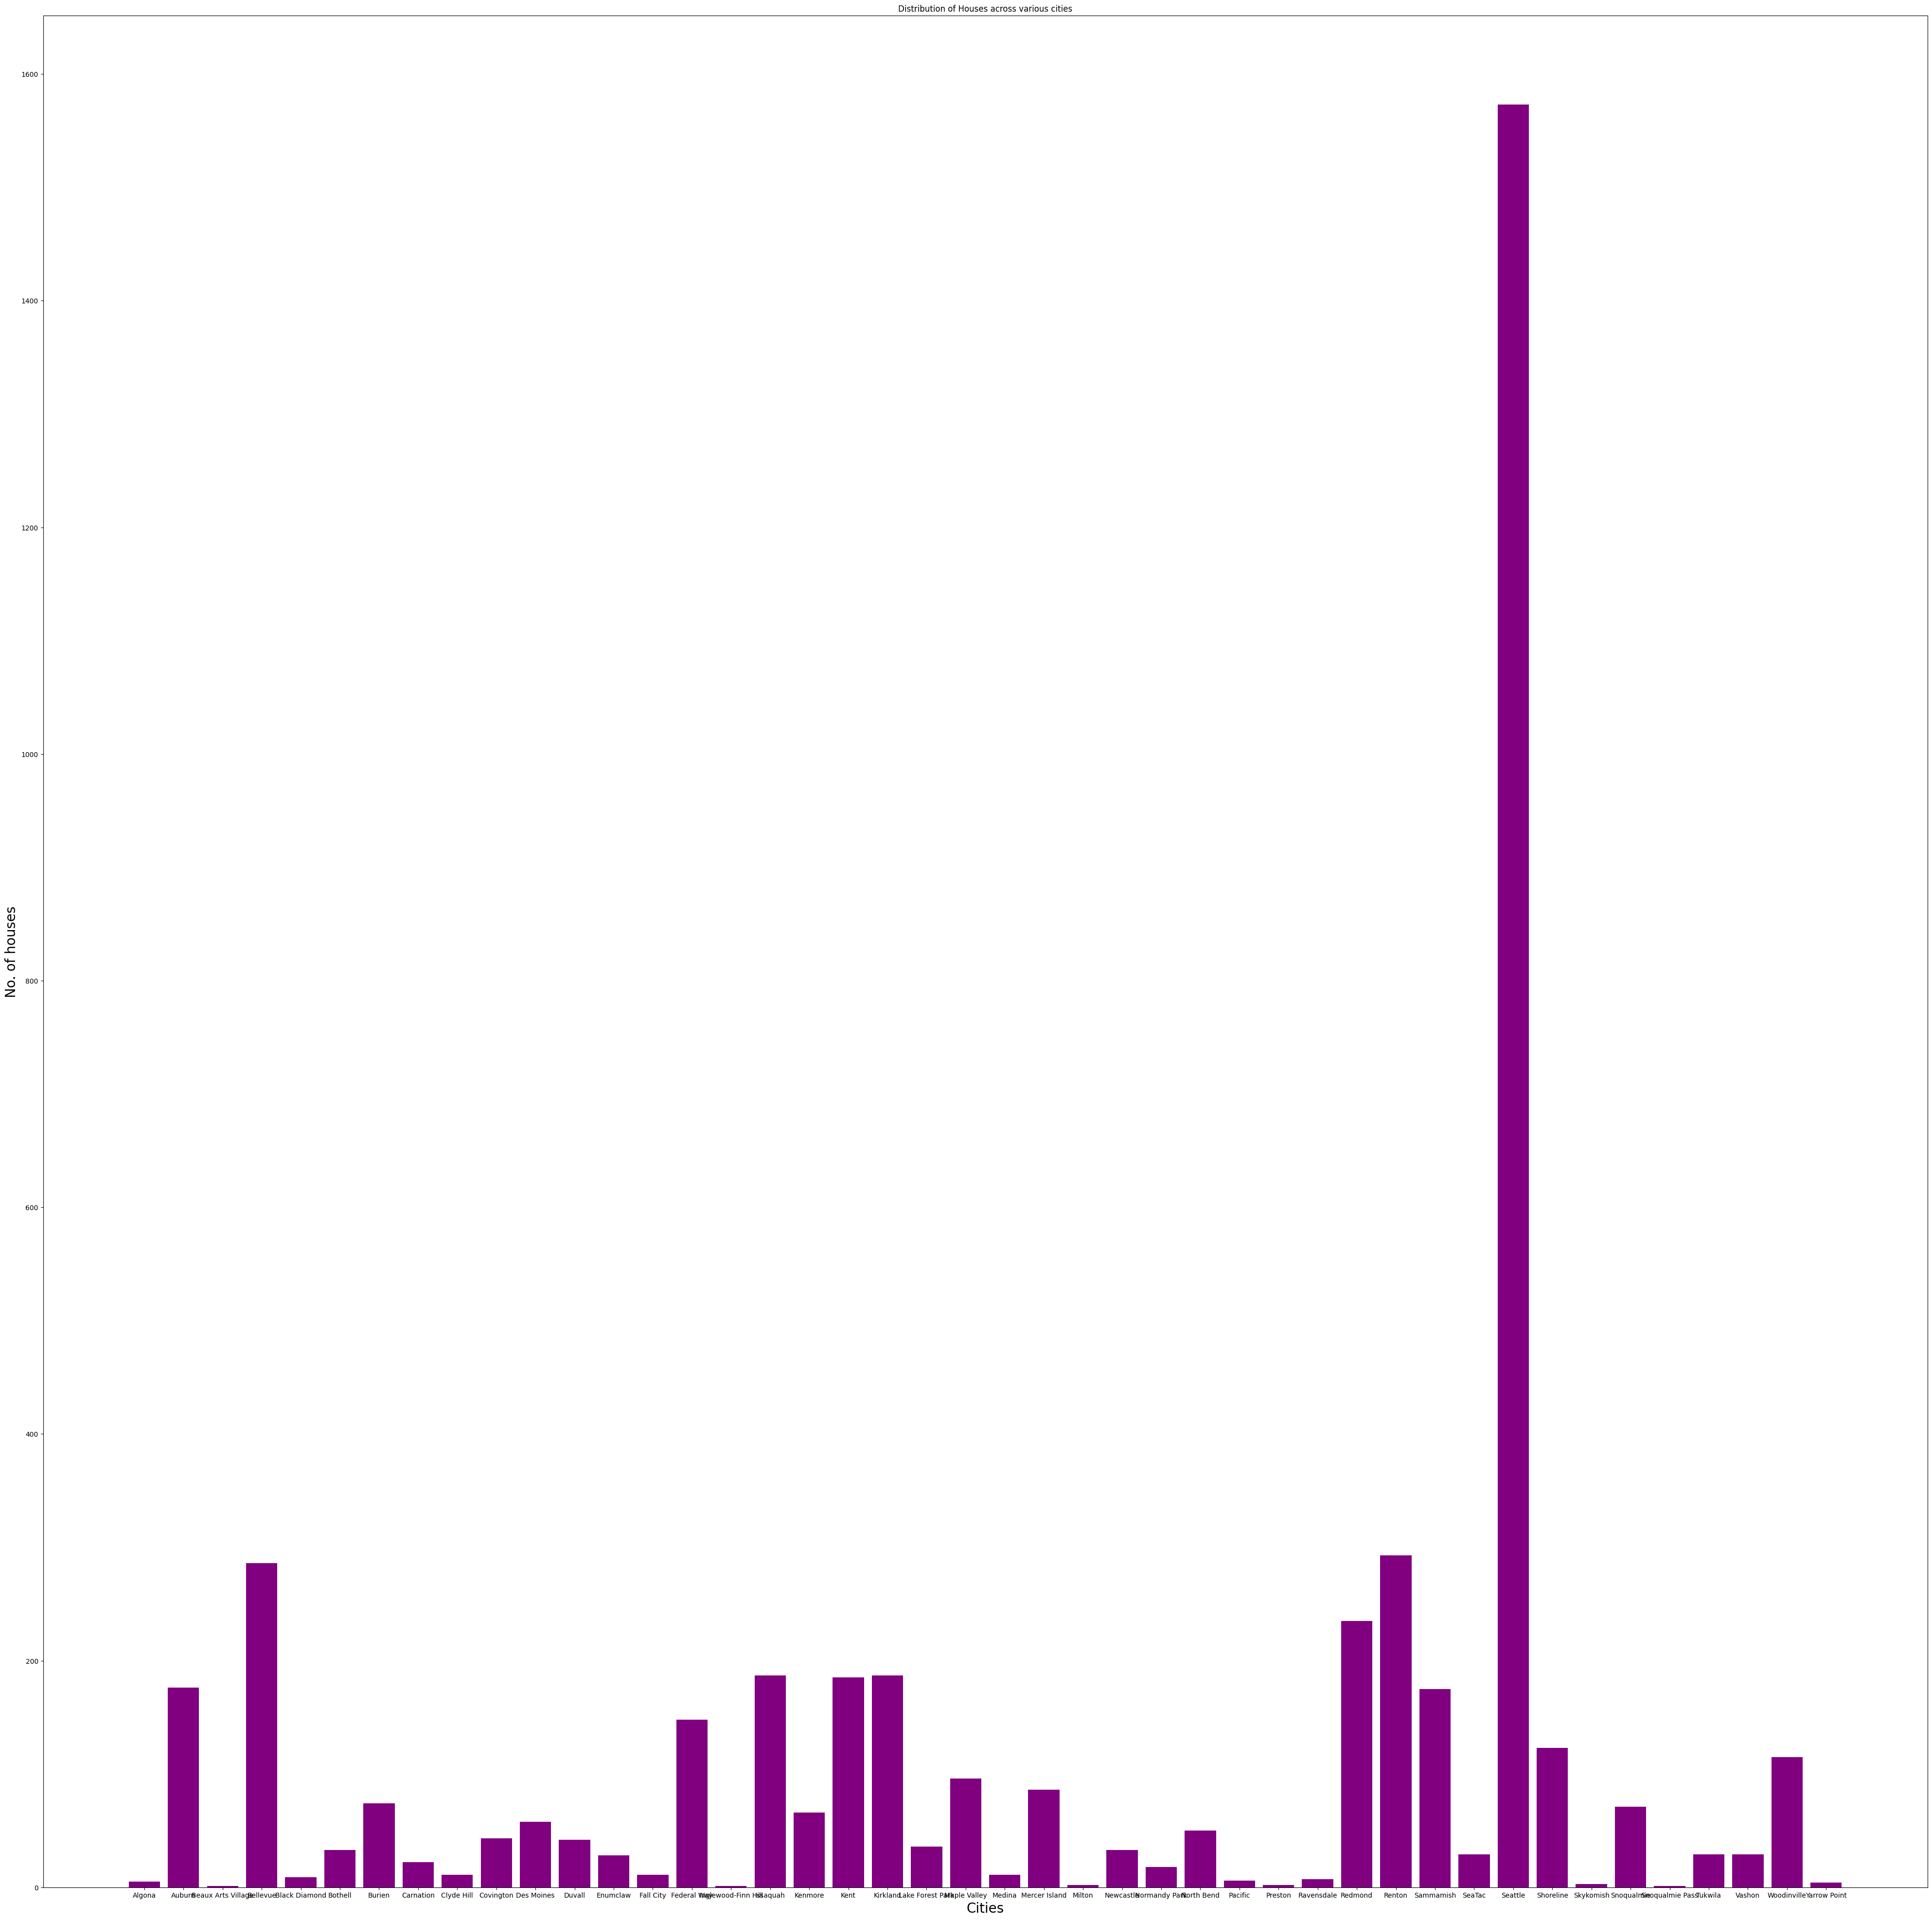

In [32]:
house_counts_city = data['city'].value_counts().sort_index()
print(house_counts_city.max())
plt.figure(figsize=(50, 50))
plt.bar(house_counts_city.index, house_counts_city.values, color='purple')
plt.xlabel('Cities', fontsize=20)
plt.ylabel('No. of houses', fontsize=20)
plt.title('Distribution of Houses across various cities')
plt.show()

<Axes: ylabel='yr_built'>

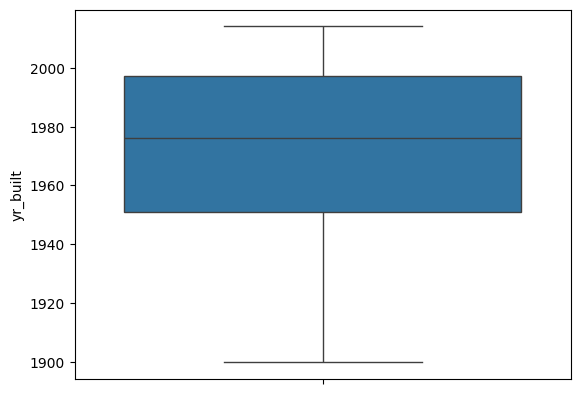

In [14]:
sns.boxplot(data['yr_built'])#checking the year range when most of the houses in the dataset where built (1950-2000)

Binning

In [11]:
data['yr_built_bins'] = pd.cut(data['yr_built'], bins=5, labels=False)

bin_edges = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
bin_labels = ['0-1000', '1000-2000', '3000-4000', '4000-5000', '6000-7000', '7000-8000', '8000-9000', '9000 and above']

data['sqft_above_bins'] = pd.cut(data['sqft_above'], bins=bin_edges, labels=bin_labels, right=False)

In [12]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_built_bins,sqft_above_bins
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2,0-1000
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,0,3000-4000
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2,0-1000
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2,0-1000
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,3,0-1000


Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(num_data)


In [34]:
scaled_data

array([[0.01177134, 0.33333333, 0.1875    , ..., 0.        , 0.48245614,
        0.99553128],
       [0.08965777, 0.55555556, 0.3125    , ..., 0.05809129, 0.18421053,
        0.        ],
       [0.01286198, 0.33333333, 0.25      , ..., 0.        , 0.57894737,
        0.        ],
       ...,
       [0.01567898, 0.33333333, 0.3125    , ..., 0.        , 0.95614035,
        0.        ],
       [0.00764949, 0.44444444, 0.25      , ..., 0.21161826, 0.64912281,
        0.        ],
       [0.00829635, 0.33333333, 0.3125    , ..., 0.        , 0.78947368,
        0.        ]])

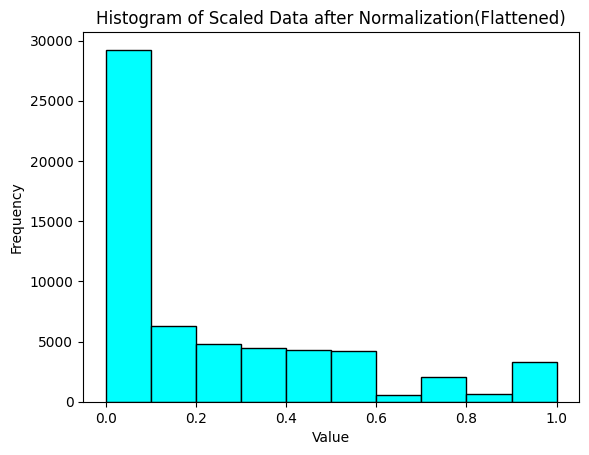

In [57]:
scaled_data = np.array(scaled_data)  # Convert the array of lists to a NumPy array

# Flatten the array of lists into a 1D array
flattened_data = scaled_data.flatten()

# Create a histogram of the flattened data
plt.hist(flattened_data, bins=10, color='cyan', edgecolor='black')
plt.title('Histogram of Scaled Data after Normalization(Flattened)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

All values lie between 0 and 1 when we use MinMax Normalization

Z-Score Normalization(Standardization)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data1 = scaler.fit_transform(num_data)

In [54]:
scaled_data1

array([[-0.42386353, -0.44112227, -0.84320364, ..., -0.67246372,
        -0.53101376,  1.22167046],
       [ 3.2495981 ,  1.75970468,  0.43280154, ..., -0.06912828,
        -1.67469295, -0.82569345],
       [-0.37242442, -0.44112227, -0.20520105, ..., -0.67246372,
        -0.1609999 , -0.82569345],
       ...,
       [-0.23956224, -0.44112227,  0.43280154, ..., -0.67246372,
         1.2854179 , -0.82569345],
       [-0.61826787,  0.6592912 , -0.20520105, ...,  1.5254011 ,
         0.10810108, -0.82569345],
       [-0.58775916, -0.44112227,  0.43280154, ..., -0.67246372,
         0.64630305, -0.82569345]])

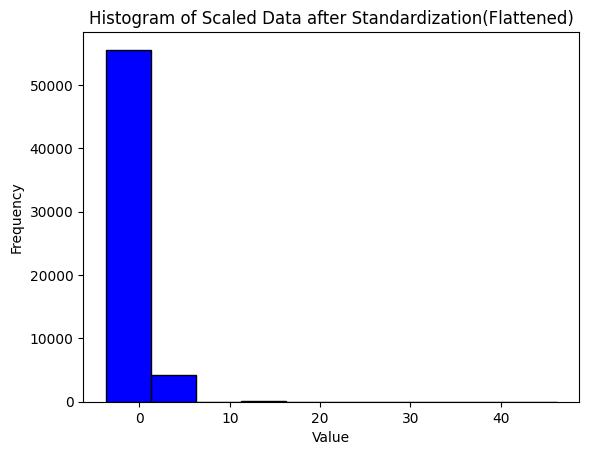

In [56]:
scaled_data1 = np.array(scaled_data1)  # Convert the array of lists to a NumPy array

# Flatten the array of lists into a 1D array
flattened_data1 = scaled_data1.flatten()

# Create a histogram of the flattened data
plt.hist(flattened_data1, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Scaled Data after Standardization(Flattened)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Mean is 0 and Standard Deviation is 1. The minimum and maximum values can be anything for standardized data. This is more useful in cases where there are more outliers.